# Exploratory data analysis (EDA) of the Absenteeism at work Data Set

In [46]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.model_selection import train_test_split

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
data = pd.read_csv('data/Absenteeism_at_work.csv', sep=";")

In [3]:
data['Social drinker'] = data['Social drinker'].astype('bool')
data['Social smoker'] = data['Social smoker'].astype('bool')
data['Disciplinary failure'] = data['Disciplinary failure'].astype('bool')
data['Seasons'] = data['Seasons'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Day of the week'] = data['Day of the week'].astype('category')
data['Month of absence'] = data['Month of absence'].astype('category')
data['Reason for absence'] = data['Reason for absence'].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason for absence               740 non-null    category
 2   Month of absence                 740 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    int64   
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work load Average/day            740 non-null    float64 
 10  Hit target                       740 non-null    int64   
 11  Disciplinary failure             740 non-null    bool    
 12  Educatio

In [8]:
train_df, test_df = train_test_split(data, test_size=0.3, random_state=123)

In [26]:
# all columns
all_col = list(train_df.columns)

In [13]:
# numeric columns including target
num1 = train_df.loc[:,'Transportation expense':'Hit target']
num2 = train_df['Son']
num3 = train_df.loc[:, 'Pet':'Absenteeism time in hours']
num = pd.concat((num1, num2, num3), axis=1)
num_col = list(num.columns)

In [15]:
# categorical columns
cat = train_df.loc[:, "Reason for absence":"Seasons"]
cat_col = list(cat.columns)

In [17]:
# binary columns
binary = train_df[["Disciplinary failure", "Social drinker", "Social smoker"]]
binary_col = list(binary.columns)

In [20]:
# ordinal column
ordinal= train_df[["Education"]]
ordinal_col = list(ordinal.columns)

# Summary of the data set (YIKI)

## Value Count Table

# Overall exploratory data analysis


## Correlation Matrix (GUANSHU)

## Frequency Distributions for all columns (RACHEL) 

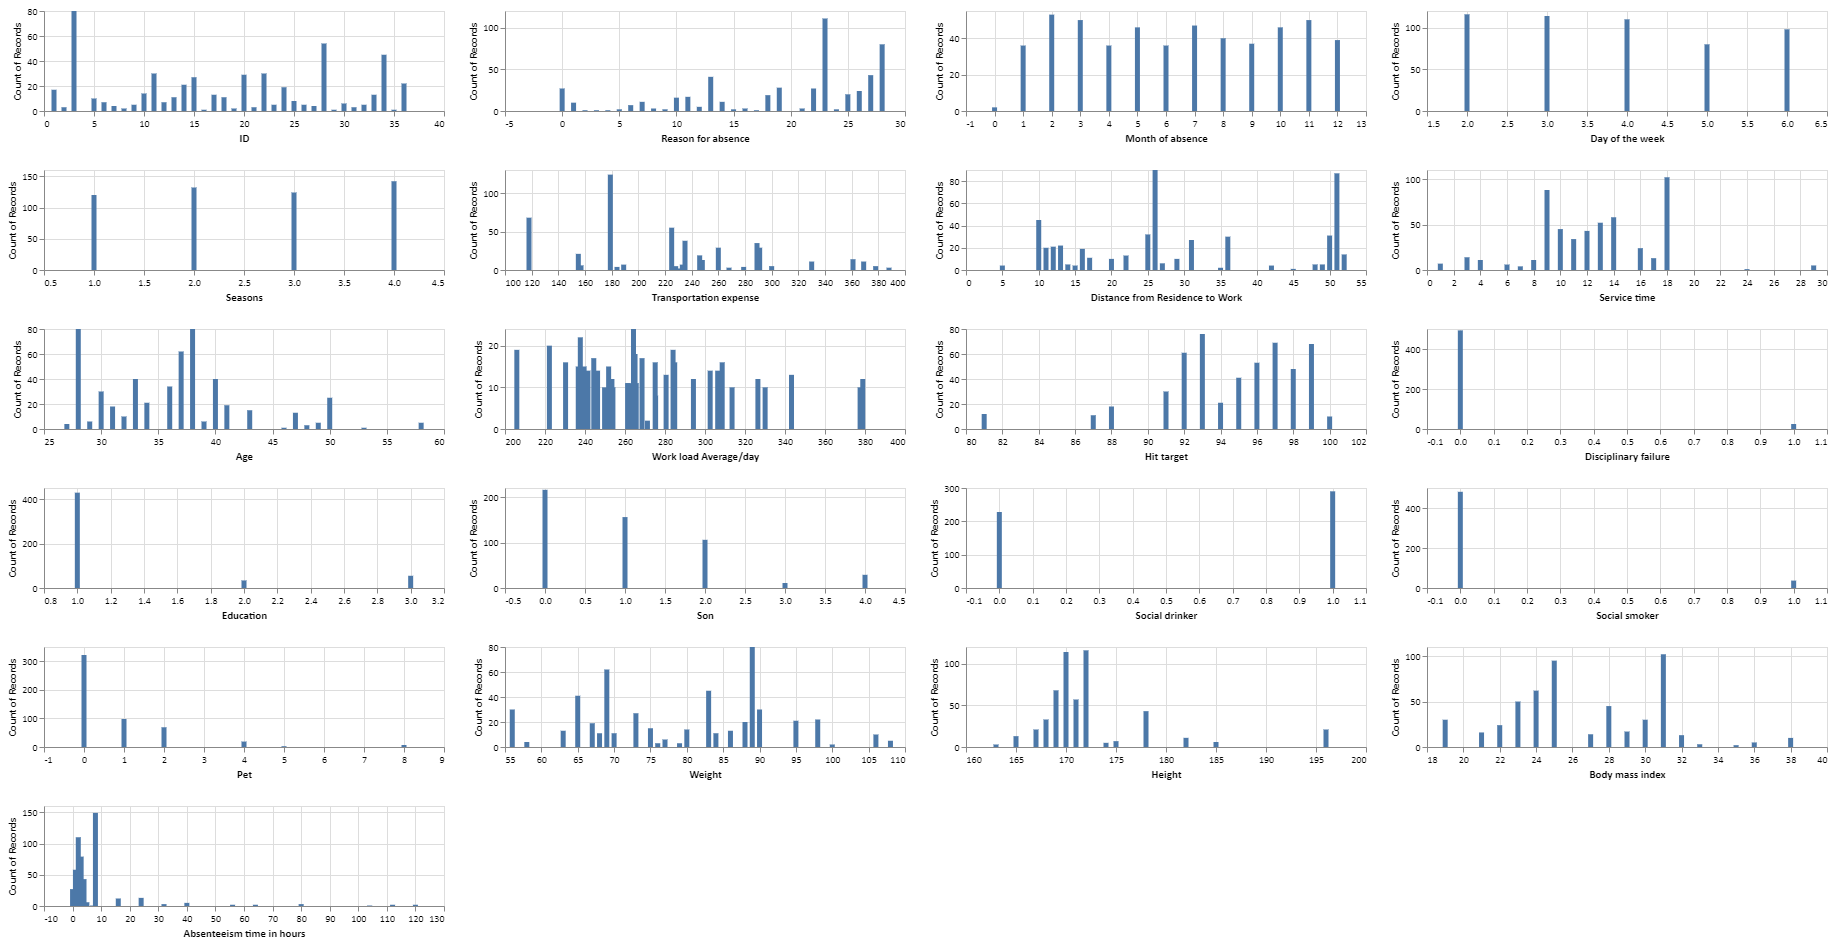

In [36]:
# Historgrams for all columns
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat("repeat"), type='quantitative'),
    alt.Y('count()')
).properties(height=100, width=400
).repeat(repeat=all_col, columns=4)

## Reasons of Absence Table (YIKI)

# Numeric data analysis (RACHEL) 


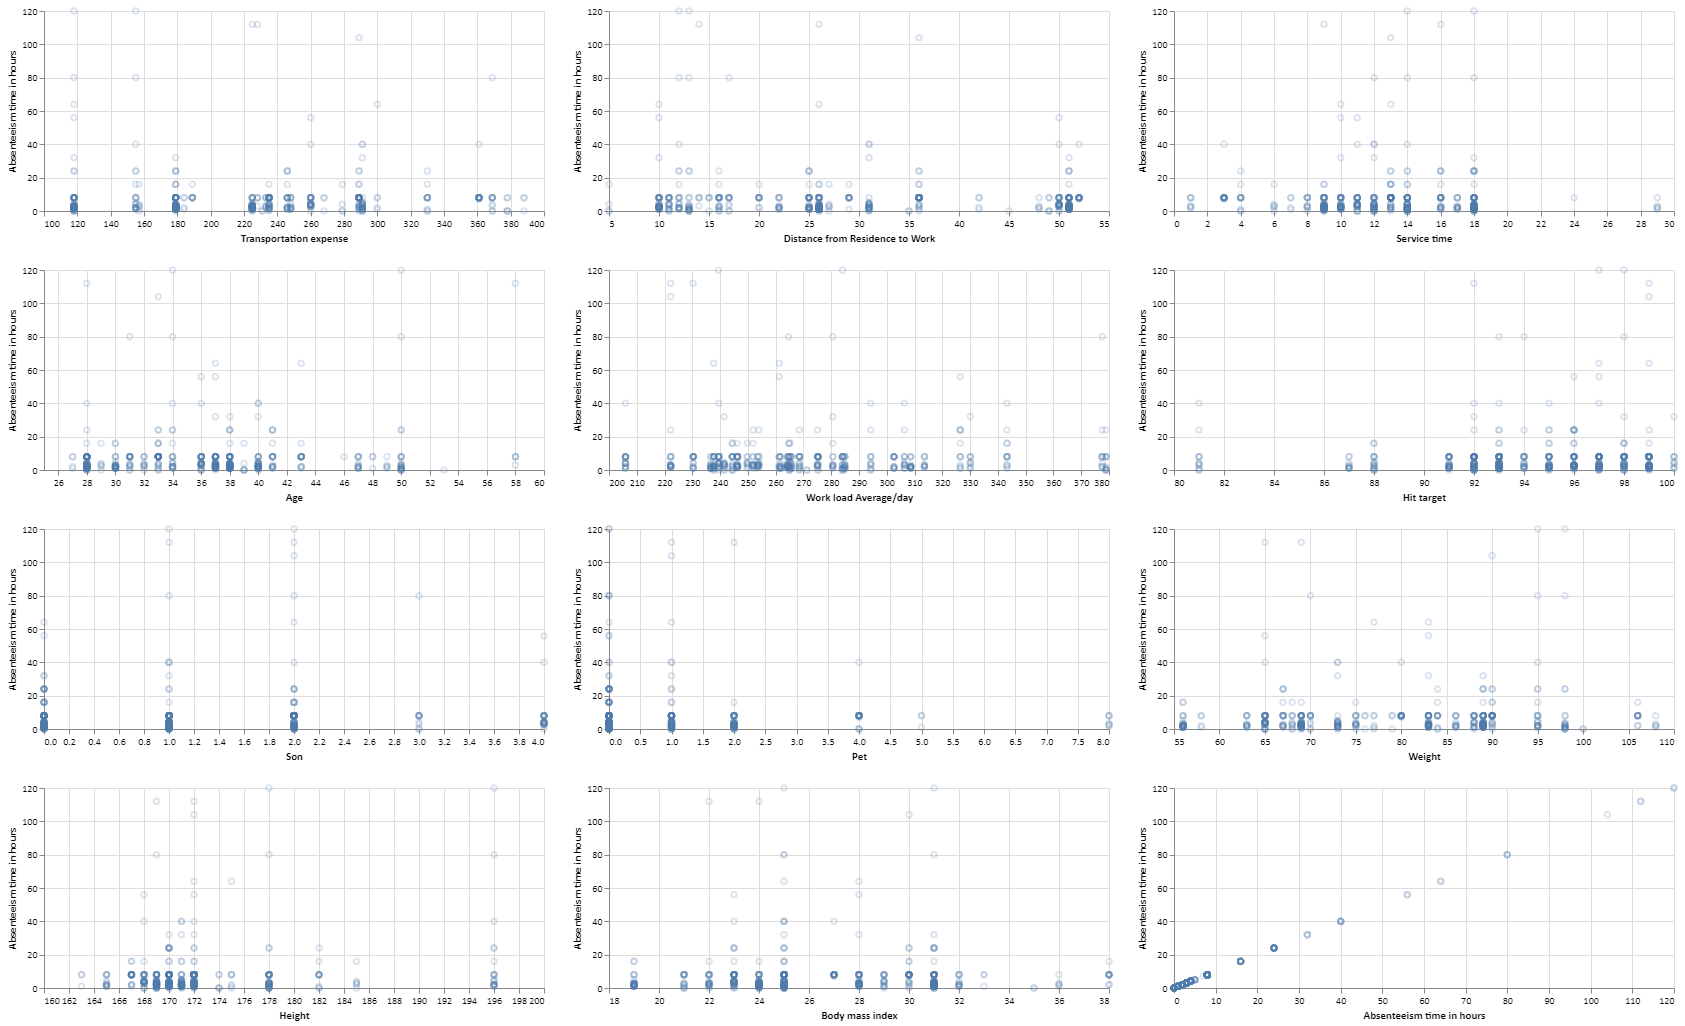

In [47]:
# scatterplots for each numeric column  vs. target
alt.Chart(num).mark_point(opacity=0.2).encode(
    alt.X(alt.repeat("repeat"), type='quantitative', scale=alt.Scale(zero=False)),
    alt.Y('Absenteeism time in hours', scale=alt.Scale(zero=False))
).properties(width=500,
             height=200
).repeat(repeat=num_col, columns=3)

> Add comments (Santiago)

# Categorical data analysis (RACHEL) 


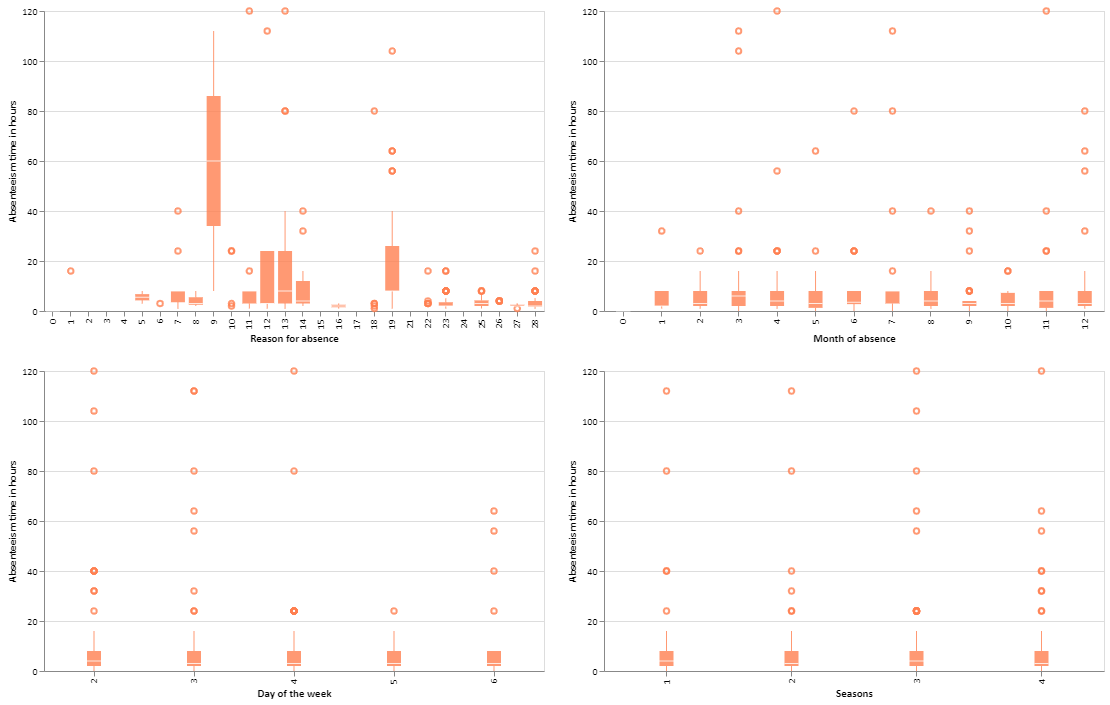

In [41]:
# boxplots for all categorical features vs. target
alt.Chart(train_df).mark_boxplot(color='coral', opacity=0.8).encode(
    alt.X(alt.repeat("repeat"), type='nominal'),
    alt.Y('Absenteeism time in hours')
).properties(width=500, height=300
).repeat(repeat=cat_col, columns=2)

> Add comments (Santiago)

# Binary data analysis (RACHEL) 


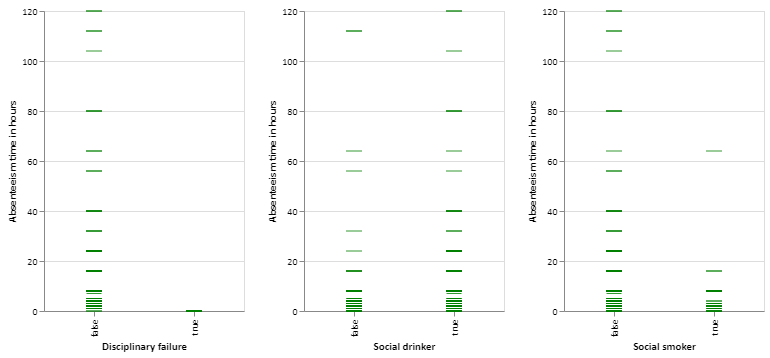

In [42]:
# boxplots for all binary features vs. target
alt.Chart(train_df).mark_tick(color='green', opacity=0.8).encode(
    alt.X(alt.repeat("repeat"), type='nominal'),
    alt.Y('Absenteeism time in hours')
).properties(width=200, height=300
).repeat(repeat=binary_col, columns=3)

> Add comments (Santiago)

# Oridnal data analysis (RACHEL) 


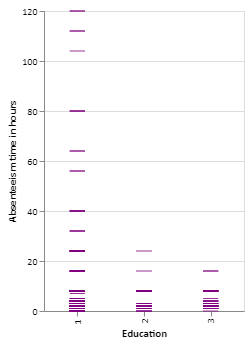

In [45]:
# boxplots for ordinal feature vs. target
alt.Chart(train_df).mark_tick(color='purple', opacity=0.8).encode(
    alt.X(alt.repeat("repeat"), type='nominal'),
    alt.Y('Absenteeism time in hours')
).properties(width=200, height=300
).repeat(repeat=ordinal_col)

> Add comments (Santiago)

# Insights & Conclusions (Santiago) 
